### **SUMMARY STATISTICS OF DATA**
- **Dataset Acquisition:** Loads the "Student Dropout" dataset directly from the UCI Machine Learning Repository.
- **Define Inputs & Outputs:** Separates the data into **Features** which are inputs and **Targets** which are outputs to establish the network structure.
- **Pre-processing:** Cleans the data by removing formatting errors ike hidden spaces to ensure the network trains smoothly.
- **Data Verification:** Generates a statistical summary such as mean, count, range to verify data quality and scale before training.

In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

# Load the dataset from UCI [cite: 34]
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 

# Extract features and targets into a single DataFrame for analysis [cite: 115]
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
df = pd.concat([X, y], axis=1)

# Clean column names by removing whitespace and tabs [cite: 116]
df.columns = df.columns.str.strip().str.replace("\t", " ")

# Generate Descriptive Statistics [cite: 66]
# .T transposes the table for better readability as shown in your slides [cite: 66, 69]
print("Descriptive Statistics (Numerical Only)")
stats_summary = df.describe().T
display(stats_summary)

Descriptive Statistics (Numerical Only)


,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


### **CHECK FOR MISSING VALUE**
<div style="text-align: justify; max-width: 95%;">
This section performs a critical data quality check by scanning all the columns and look for the number of missing or empty values. Ensuring the completeness of the dataset is a crucial pre-processing procedure. This is because missing data can lead to errors or loss in accuracy when the Neural Network is trained.
</div>

In [2]:
print("\nMissing Values per Column\n")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values per Column

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                  

### **UNIQUE VALUES CHECK**
<div style="text-align: justify; max-width: 95%;">
This section checks the different categories in the data. It displays unique values for columns containing text or in which only a few options exist. This allow us to get some understanding about our inputs and also to know which attributes need to be changed into numerical numbers before the Neural Network can use them.
</div>

In [3]:
print("\nUnique Values per Column")

for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 15:
        print(f"{col}: {df[col].unique()}")


Unique Values per Column
Marital Status: [1 2 4 3 5 6]
Application order: [5 1 2 4 3 6 9 0]
Daytime/evening attendance: [1 0]
Displaced: [1 0]
Educational special needs: [0 1]
Debtor: [0 1]
Tuition fees up to date: [1 0]
Gender: [1 0]
Scholarship holder: [0 1]
International: [0 1]
Curricular units 1st sem (without evaluations): [ 0  1  2  4  3  6 12 10  7  5  8]
Curricular units 2nd sem (without evaluations): [ 0  5  2  1  3  6  4 12  7  8]
Unemployment rate: [10.8 13.9  9.4 16.2 15.5  8.9 12.7 11.1  7.6 12.4]
Inflation rate: [ 1.4 -0.3 -0.8  0.3  2.8  3.7  0.6  2.6  0.5]
GDP: [ 1.74  0.79 -3.12 -0.92 -4.06  3.51 -1.7   2.02  0.32  1.79]
Target: ['Dropout' 'Graduate' 'Enrolled']


### **UNIQUE VALUES COUNT**
<div style="text-align: justify; max-width: 95%;">
This part sums the unique options in all columns. By examining these counts,  we can easily tell the difference between categorical data which has few options and continuous data which has many options. This is useful to know which kind of pre-processing we need to do for each attribute before to train the Neural Network.
</div>

In [4]:
unique_counts = df.nunique()

unique_df = pd.DataFrame({
    'Column': unique_counts.index, 
    'Unique Values': unique_counts.values
})

display(unique_df)

,Column,Unique Values
0,Marital Status,6
1,Application mode,18
2,Application order,8
3,Course,17
4,Daytime/evening attendance,2
5,Previous qualification,17
6,Previous qualification (grade),101
7,Nacionality,21
8,Mother's qualification,29
9,Father's qualification,34


### **IMPORTING LIBRARIES AND LOAD DATASET FROM UCI REPO**
- **Import Tools:** Imports the required tools for data handling to help balance the data classes.
- **Load Dataset:** Fetches the specific student dropout dataset directly from the online repository to ensure the correct raw data is used.
- **Clean and Rename:** Fixes the column names by removing extra spaces and renames the main output column to Target for easier access.
- **Remove Noise:** Deletes any rows that have missing values or are exact duplicates to ensure the Neural Network learns from clean data.
- **Encode Target:** Converts the text labels Graduate Dropout and Enrolled into numbers 0 1 and 2 because the Neural Network can only process numerical data.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from ucimlrepo import fetch_ucirepo

# Load the dataset from UCI repository
dataset = fetch_ucirepo(id=697) 
X_raw = dataset.data.features 
y_raw = dataset.data.targets 

df = pd.concat([X_raw, y_raw], axis=1)

# clean the column name by removing whitespace and tabs
df.columns = df.columns.str.strip().str.replace("\t", " ")

# find the target column to change its name to 'Target'
for col in df.columns:
    if df[col].isin(['Graduate', 'Dropout', 'Enrolled']).any():
        df.rename(columns={col: 'Target'}, inplace=True) 
        break

# delete rows with missing values and duplicates
df.dropna(inplace=True) 
df.drop_duplicates(inplace=True) 

# change ( GRADUATE, DROPOUT, ENROLLED ) to ( 0, 1, 2 )
df['Target'] = df['Target'].map({"Graduate": 0, "Dropout": 1, "Enrolled": 2})

print(f"Dataset shape after cleaning: {df.shape}") 

Dataset shape after cleaning: (4424, 37)


### **DROP LESS RELEVANT COLUMN**
- **Identify Unnecessary Data:** Lists specific columns such as curricular units without evaluations and international status that are considered less relevant for predicting student dropout.
- **Remove Columns:** Deletes these selected columns from the main dataset to reduce noise and simplify the input data.
- **Optimize Input:** Ensures the Neural Network focuses only on the most important features which helps improve training speed and accuracy.

In [6]:
# Define columns that should be removed if present
drop_cols = [
    'Curricular units 1st sem (credited)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (without evaluations)',
    'International'
]

# Drop only the columns that exist in the DataFrame to avoid errors
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

print(f"Columns remaining after removal: {len(df.columns)}")

Columns remaining after removal: 32


### **WINSORIZATION** 
- **Select Columns:** Chooses columns like grades and GDP to fix extreme numbers.
- **Set Limits:** Finds the safe range for the data.
- **Cap Data:** Adjusts extreme values to fit inside this safe range instead of deleting them.
- **Goal:** Helps the Neural Network learn better by removing wild outliers.

In [7]:
# List of numeric columns where outliers should be capped
outlier_cols = [
    'Previous qualification (grade)', 
    'Admission grade',
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)',
    'Unemployment rate', 
    'Inflation rate', 
    'GDP'
]

# Loop through each column and clip values to 5th-95th percentile
for col in outlier_cols:
    if col in df.columns:  
        # Compute 5th and 95th percentiles
        q5, q95 = df[col].quantile([0.05, 0.95])
        
        # Clip values outside the percentile range
        df[col] = df[col].clip(lower=q5, upper=q95)
        
        print(f" {col}: clipped to [{q5:.2f}, {q95:.2f}]")

 Previous qualification (grade): clipped to [110.00, 157.00]
 Admission grade: clipped to [103.42, 153.50]
 Curricular units 1st sem (grade): clipped to [0.00, 14.86]
 Curricular units 2nd sem (grade): clipped to [0.00, 14.98]
 Unemployment rate: clipped to [7.60, 16.20]
 Inflation rate: clipped to [-0.80, 3.70]
 GDP: clipped to [-4.06, 3.51]


### **FEATURE SCALING**
- **Select Inputs:** Chooses all columns except the 'Target' to act as input variables.
- **Normalize Data:** Rescales all numbers to a 0-1 range so large values do not overpower small ones.
- **Handle Missing:** Fills any remaining empty slots with 0 to ensure the training runs without errors.

</div>

In [8]:
# Select all columns except the target column
feature_cols = [col for col in df.columns if col != 'Target']

# Apply min-max scaling to bring all features to range [0, 1]
df[feature_cols] = (df[feature_cols] - df[feature_cols].min()) / (df[feature_cols].max() - df[feature_cols].min())

# Fill any missing values with 0 to avoid errors during training
df.fillna(0, inplace=True)

print(f" Features used: {len(feature_cols)} columns")


 Features used: 31 columns


### **TRAIN-TEST SPLIT (80/20)**
- **Separate Data:** Splits the dataset into Features (X) which are the inputs and Target (y) which is the output label.
- **Shuffle Order:** Randomly mixes the data order using a specific seed to ensure the results can be reproduced later.
- **Define Split:** Calculates the exact cut-off point to use 80% of the data for training and keep 20% for testing.
- **Create Sets:** Divides the features and targets into two separate groups. The Training set is used to teach the model while the Testing set is used to evaluate its performance.


In [9]:
# Prepare feature matrix X and target vector y
X = df[feature_cols].values
y = df['Target'].values

# Set random seed for reproducibility of the split
np.random.seed(42)

# Shuffle indices to randomize the dataset
indices = np.random.permutation(len(X))

# Determine split point for 80% training data
split = int(0.8 * len(X))

# Split features and labels into training and testing sets
X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 3539
Testing set size: 885


### **OVERSAMPLING WITH SMOTE**
- **Create Tool:** Sets up the SMOTE tool with a fixed random seed to ensure the results are consistent every time.
- **Balance Data:** Generates new synthetic examples for the minority classes in the training set so that all groups have equal data.
- **Verify Result:** Prints the new counts for each class to confirm that the dataset is now perfectly balanced.

In [10]:

# Create SMOTE object for oversampling minority classes
sm = SMOTE(random_state=42)

# Apply SMOTE to the training set to balance class distribution
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)

print(f" After SMOTE: {np.bincount(y_train_os)}")

 After SMOTE: [1747 1747 1747]


### **ONE-HOT ENCODING**

technique used to represent categorical data in a numerical format suitable for machine learning models

In [11]:
import numpy as np

# Function to convert integer labels into one-hot encoded vectors
def one_hot(y, num_classes=3):
    # np.eye creates an identity matrix
    return np.eye(num_classes)[y.astype(int)]

# Convert training and test labels to one-hot encoding
y_train_oh = one_hot(y_train_os)
y_test_oh = one_hot(y_test)

print("One-Hot Encoding Example:")
print(f"Graduate: {y_train_oh[0]} (if index 0 is Graduate)")


One-Hot Encoding Example:
Graduate: [0. 1. 0.] (if index 0 is Graduate)


### **DEFINE BPNN MODEL**
- Initialization: Sets up weights and biases for 3
hidden layers and the output layer.
- Activation Functions: Uses ReLU for hidden layers
and Softmax for multi-class classification.
- Forward Propagation: Passes input through the
layers to generate predictions.
- Loss Function: Uses categorical cross-entropy to
measure prediction error.
- Backward Propagation: Calculates gradients and
updates weights using gradient descent.
- Prediction: Uses argmax to choose the class with
the highest probability.

In [12]:
class BPNN:
    def __init__(self, input_size, h1, h2, h3, output_size, lr=0.009):
        self.lr = lr
        self.W1 = np.random.randn(input_size, h1) * np.sqrt(2/input_size)
        self.b1 = np.zeros((1, h1))
        self.W2 = np.random.randn(h1, h2) * np.sqrt(2/h1)
        self.b2 = np.zeros((1, h2))
        self.W3 = np.random.randn(h2, h3) * np.sqrt(2/h2)
        self.b3 = np.zeros((1, h3))
        self.W4 = np.random.randn(h3, output_size) * np.sqrt(2/h3)
        self.b4 = np.zeros((1, output_size))

# Activation functions
    def relu(self, x): return np.maximum(0, x)
    def relu_deriv(self, x): return (x > 0).astype(float)
    def softmax(self, x):
        exp = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)

# Forward propagation
    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = self.relu(self.Z2)
        self.Z3 = self.A2 @ self.W3 + self.b3
        self.A3 = self.relu(self.Z3)
        self.Z4 = self.A3 @ self.W4 + self.b4
        self.A4 = self.softmax(self.Z4)
        return self.A4

# Loss function
    def compute_loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

# Backward pass and weight updates
    def backward(self, X, y_true, y_pred):
        m = y_true.shape[0]

        dZ4 = y_pred - y_true
        dW4 = self.A3.T @ dZ4 / m
        db4 = np.sum(dZ4, axis=0, keepdims=True) / m

        dA3 = dZ4 @ self.W4.T
        dZ3 = dA3 * self.relu_deriv(self.Z3)
        dW3 = self.A2.T @ dZ3 / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        dA2 = dZ3 @ self.W3.T
        dZ2 = dA2 * self.relu_deriv(self.Z2)
        dW2 = self.A1.T @ dZ2 / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * self.relu_deriv(self.Z1)
        dW1 = X.T @ dZ1 / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W4 -= self.lr * dW4; self.b4 -= self.lr * db4
        self.W3 -= self.lr * dW3; self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2; self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1; self.b1 -= self.lr * db1

#Predict function
    def predict(self, X):
        return np.argmax(self.forward(X), axis=1) 

### **TRAIN THE MODEL**
- **Initialize Model:** Sets up the Neural Network with specific hidden layers and a fixed learning speed.
- **Start Training:** Runs the learning process up to 1500 times to teach the model patterns in the data.
- **Learn and Correct:** Calculates the error and updates the internal weights of the model to fix its mistakes.
- **Track Progress:** Measures how accurate the model is on both the training and testing data at every step.
- **Early Stopping:** Automatically stops the training if the model stops improving or reaches a very low error rate to save time.

In [13]:
model = BPNN(X_train_os.shape[1], 256, 128, 64, 3, lr=0.009)
epochs = 1000

losses, train_accs, test_accs = [], [], []
best_acc, patience, wait = 0, 200, 0

for epoch in range(epochs):

    y_pred_train = model.forward(X_train_os)
    loss = model.compute_loss(y_train_oh, y_pred_train)
    
    model.backward(X_train_os, y_train_oh, y_pred_train)
    
    acc_train = np.mean(np.argmax(y_pred_train, axis=1) == y_train_os) * 100
    acc_test = np.mean(model.predict(X_test) == y_test) * 100
    
    losses.append(loss)
    train_accs.append(acc_train)
    test_accs.append(acc_test)
    
    if acc_test > best_acc:
        best_acc = acc_test
        wait = 0
    else:
        wait += 1
        
    if loss < 0.001:
        print(f"Early stopping at epoch {epoch+1} - Loss below 0.001")
        break
    if wait > patience:
        print(f"Early stopping at epoch {epoch+1} - Best Test Acc: {best_acc:.2f}%")
        break
        
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch+1}/{epochs} Loss: {loss:.4f} Train Acc: {acc_train:.2f}% Test Acc: {acc_test:.2f}%")

Epoch 1/1000 Loss: 1.2200 Train Acc: 24.84% Test Acc: 17.63%
Epoch 101/1000 Loss: 0.9504 Train Acc: 56.36% Test Acc: 58.42%
Epoch 201/1000 Loss: 0.8665 Train Acc: 60.08% Test Acc: 60.68%
Epoch 301/1000 Loss: 0.8226 Train Acc: 62.28% Test Acc: 62.49%
Epoch 401/1000 Loss: 0.7953 Train Acc: 63.80% Test Acc: 63.84%
Epoch 501/1000 Loss: 0.7744 Train Acc: 65.04% Test Acc: 64.86%
Epoch 601/1000 Loss: 0.7564 Train Acc: 66.21% Test Acc: 66.21%
Epoch 701/1000 Loss: 0.7403 Train Acc: 67.33% Test Acc: 67.68%
Epoch 801/1000 Loss: 0.7255 Train Acc: 68.35% Test Acc: 68.36%
Epoch 901/1000 Loss: 0.7117 Train Acc: 69.53% Test Acc: 69.60%
Epoch 1000/1000 Loss: 0.6995 Train Acc: 70.35% Test Acc: 70.06%


### **FINAL EVALUATION**
the trained model is used to make predictions on the test set

In [14]:
# Predict labels for the test dataset
y_pred_test = model.predict(X_test)

# Calculate test accuracy as a percentage
test_accuracy = np.mean(y_pred_test == y_test) * 100
print(f"\nFinal Test Accuracy: {test_accuracy:.2f}%")   


Final Test Accuracy: 70.06%


### **PLOT LOSS & ACCURACY**
- **Setup Canvas:** Creates a wide figure layout to hold two different graphs side by side.
- **Plot Loss:** Draws the error line in red on the left chart to show how the model mistake rate dropped during training.
- **Plot Accuracy:** Draws the training and testing accuracy lines on the right chart using blue and green colors to compare performance.
- **Display:** Organizes the layout neatly and presents the final visual graphs for analysis.

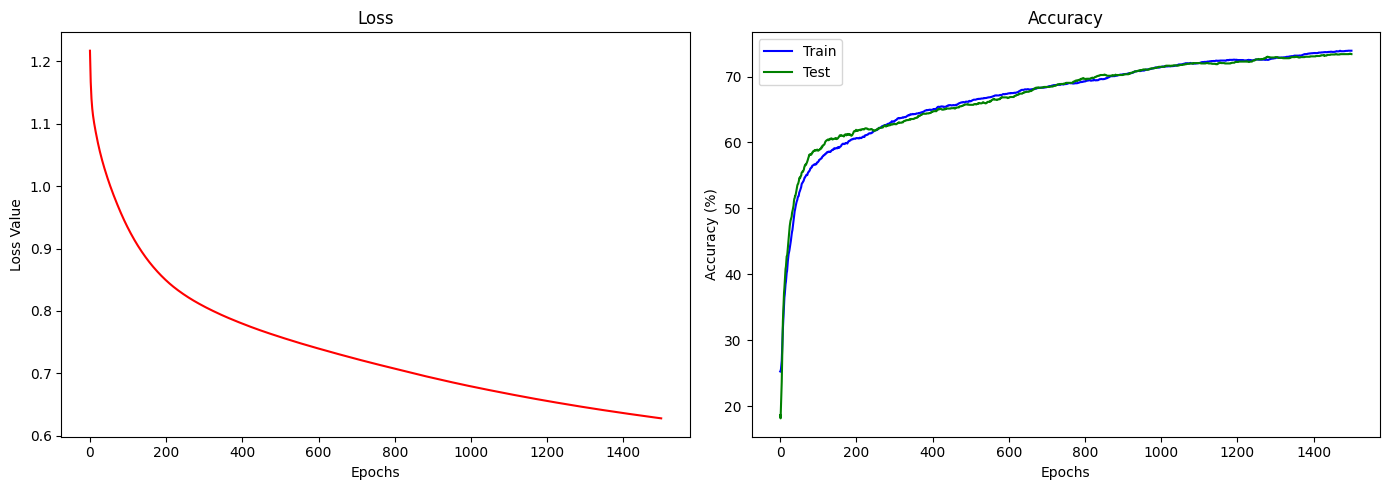

In [16]:
# Create a wide figure for two plots side by side
plt.figure(figsize=(14, 5))

# Plot 1: Loss
plt.subplot(1, 2, 1)  
plt.plot(losses, color='red')  
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")

# Plot 2: Accuracy 
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(train_accs, label="Train", color='blue')  
plt.plot(test_accs, label="Test", color='green')   
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend() 

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### **CONFUISION MATRIX**
It shows how many students were correctly or
incorrectly classified into the three categories

[[353  14  95]
 [ 24 188  59]
 [ 38  35  79]]


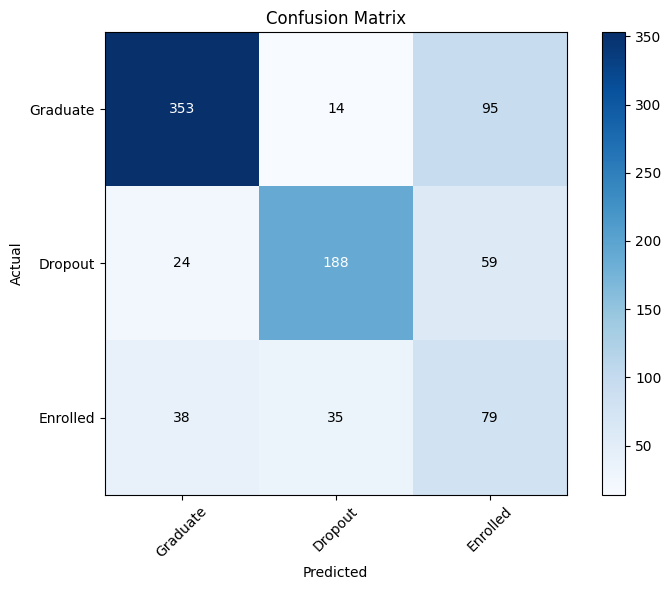

In [15]:
# Generate predictions for the test dataset
y_pred_final = model.predict(X_test)

# Initialize a 3x3 confusion matrix with zeros
cm = np.zeros((3, 3), dtype=int)

# Fill the confusion matrix
# Rows = actual classes, Columns = predicted classes
for i in range(len(y_test)):
    cm[int(y_test[i]), int(y_pred_final[i])] += 1

# Print the numeric confusion matrix
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Set axis labels and ticks
tick_marks = np.arange(3)
class_labels = ['Graduate', 'Dropout', 'Enrolled']
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Add counts in each cell with color adjustment
for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

# Label axes
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### **CLASSIFICATION REPORT**
- **Import Tool:** Brings in the specific function needed to calculate detailed performance metrics for the model.
- **Generate Report:** Compares the actual test results against the final predictions to evaluate how well the model performed.
- **Label Classes:** Assigns readable names like Graduate Dropout and Enrolled to the numerical categories for better clarity.
- **Format Output:** Converts the raw statistics into a neat table format that is easy to read and analyze.

In [16]:
# Import evaluation function for classification models
from sklearn.metrics import classification_report

# Generate a detailed classification report as a dictionary
report = classification_report(y_test, y_pred_final, 
                               target_names=["Graduate", "Dropout", "Enrolled"], 
                               output_dict=True)

# Convert the report dictionary into a DataFrame and transpose
report_df = pd.DataFrame(report).transpose()
display(report_df)

,precision,recall,f1-score,support
Graduate,0.850602,0.764069,0.805017,462.000000
Dropout,0.793249,0.693727,0.740157,271.000000
Enrolled,0.339056,0.519737,0.410390,152.000000
accuracy,0.700565,0.700565,0.700565,0.700565
macro avg,0.660969,0.659178,0.651855,885.000000
weighted avg,0.745181,0.700565,0.717378,885.000000


### **SUMMARY MATRIX TABLE**
<div style="text-align: justify; max-width: 95%;">
This section makes a brief summary table by keeping only the essential performance scores from the full report. It is a high-level summary of the results consisting of accuracy and macro and weighted averages among others. The code also changes the technical labels to clear and professional titles so the final output is easy to understand at a glance.
</div>

In [17]:
# Select only overall performance rows from the classification report
summary_df = report_df.loc[['accuracy', 'macro avg', 'weighted avg']].copy()

# Rename row labels to make them clearer and presentation-friendly
summary_df.rename(index={
    'accuracy': "Accuracy (Overall)",
    'macro avg': "Macro Average",
    'weighted avg': "Weighted Average"
}, inplace=True)

display(summary_df)

,precision,recall,f1-score,support
Accuracy (Overall),0.700565,0.700565,0.700565,0.700565
Macro Average,0.660969,0.659178,0.651855,885.000000
Weighted Average,0.745181,0.700565,0.717378,885.000000


### **SAMPLE PREDICTION**
<div style="text-align: justify; max-width: 95%;">
This section creates a side-by-side comparison table to easily check the model's performance. It takes the actual correct answers and the model's predicted answers, which are originally just numbers, and converts them back into readable text labels like Graduate or Dropout. Lastly, it shows the first 10 rows of this mapping so that we can visually confirm whether the model is taking the right actions.
</div>

In [18]:
# Create a DataFrame 
results_df = pd.DataFrame({

    # True labels from the test dataset (numeric)
    'Actual': y_test,

    # Model predictions (numeric)
    'Predicted': y_pred_final
})

# Dictionary to convert numeric labels into readable class names
label_mapping = {0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'}

# Convert numeric actual labels into text labels
results_df['Actual Label'] = results_df['Actual'].map(label_mapping)

# Convert numeric predicted labels into text labels
results_df['Predicted Label'] = results_df['Predicted'].map(label_mapping)

display(results_df.head(10))

,Actual,Predicted,Actual Label,Predicted Label
0,0,0,Graduate,Graduate
1,0,0,Graduate,Graduate
2,0,2,Graduate,Enrolled
3,0,1,Graduate,Dropout
4,1,0,Dropout,Graduate
5,0,0,Graduate,Graduate
6,0,0,Graduate,Graduate
7,0,2,Graduate,Enrolled
8,0,0,Graduate,Graduate
9,0,2,Graduate,Enrolled


### **BEST EPOCH BY TEST ACCURACY**
<div style="text-align: justify; max-width: 95%;">
 This section identifies the specific training round or epoch where the model performed best on the testing data. It goes through the history and retrieves the maximum test accuracy with the associated information such as training accuracy, loss value. Finally it displays these statistics in miniature in a small table so that the peak performance of the model can be conveniently inspected.
 </div>

In [19]:
# Find the index of the epoch with the highest test accuracy
best_epoch = np.argmax(test_accs)

# Create a DataFrame
best_acc_row = pd.DataFrame({

    # Add 1 to convert index to epoch number
    'Epoch': [best_epoch + 1],

    # Training accuracy at the best epoch
    'Train Accuracy (%)': [train_accs[best_epoch]],

    # Highest test accuracy achieved
    'Test Accuracy (%)': [test_accs[best_epoch]],

    # Loss value at the best epoch
    'Loss': [losses[best_epoch]]
})

display(best_acc_row)

,Epoch,Train Accuracy (%),Test Accuracy (%),Loss
0,984,70.215608,70.056497,0.701384


### **LAST 10 EPOCH PERFORMANCE**
<div style="text-align: justify; max-width: 95%;">
This part will show the performance of the last 10 rounds of training. It provides a table with the number of epochs, the training accuracy, and the testing accuracy as well as the loss value of each of these final steps. Considering these final few rows through the tail command we can determine whether the model was continuously getting better or whether it had levelled off at the termination of the process.
</div>

In [20]:
# Create a DataFrame
epoch_df = pd.DataFrame({

    # Epoch numbers
    'Epoch': np.arange(1, len(train_accs) + 1),

    # Training accuracy recorded at each epoch
    'Train Accuracy (%)': train_accs,

    # Testing accuracy recorded at each epoch
    'Test Accuracy (%)': test_accs,

    # Loss value recorded at each epoch
    'Loss': losses
})

display(epoch_df.tail(10))

,Epoch,Train Accuracy (%),Test Accuracy (%),Loss
990,991,70.272849,70.056497,0.700554
991,992,70.272849,70.056497,0.700436
992,993,70.272849,70.056497,0.700317
993,994,70.291929,70.056497,0.700199
994,995,70.291929,70.056497,0.700080
995,996,70.311009,70.056497,0.699962
996,997,70.330090,70.056497,0.699843
997,998,70.349170,70.056497,0.699725
998,999,70.349170,70.056497,0.699607
999,1000,70.349170,70.056497,0.699488


now , this is the experiment 1 .. we need to do atleast 5 more experiment with different dataset split , epoch , learning rate and hidden layer 

- Experiment 1: 80:20 Split, 1500 Epochs, 0.01   Learning Rate

- Experiment 2: 60:40 Split, 1500 Epochs, 0.01   Learning Rate

- Experiment 3: 80:20 Split, 1000 Epochs, 0.009  Learning Rate

- Experiment 4: 70:30 Split, 1000 Epochs, 0.009  Learning Rate

- Experiment 5: 80:20 Split, 1000 Epochs, 0.008  Learning Rate